# Action1	"基于评分卡的风控模型开发

数据集GiveMeSomeCredit，15万样本数据

https://www.kaggle.com/c/GiveMeSomeCredit/data

使用WOE进行特征变换，IV进行特征筛选，LR构建风控模型，并对模型评分规则进行可解释性说明 

–基本属性：包括了借款人当时的年龄

– 偿债能力：包括了借款人的月收入、负债比率

– 信用往来：两年内35-59天逾期次数、两年内60-89天逾期次数、两年内90天或高于90天逾期的次数

– 财产状况：包括了开放式信贷和贷款数量、不动产贷款或额度数量。

– 其他因素：包括了借款人的家属数量"			

"1、完成LR模型（30points）

2、对评分卡模型的规则进行说明（30points）"



In [1]:
import pandas as pd

df_train = pd.read_csv('./cs-training.csv')
df_train = df_train.iloc[:,1:]
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [2]:
df_train['SeriousDlqin2yrs'].value_counts()
import seaborn as sns
sns.countplot(x='SeriousDlqin2yrs',data= df_train)

/Users/Leigh/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df_train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [4]:
df_train['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

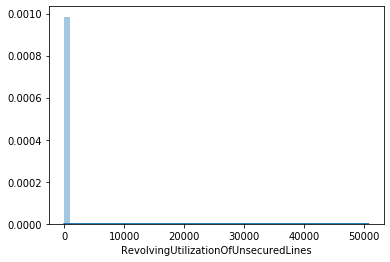

In [5]:
sns.distplot(df_train['RevolvingUtilizationOfUnsecuredLines'])

In [6]:
df_train.median()

SeriousDlqin2yrs                           0.000000
RevolvingUtilizationOfUnsecuredLines       0.154181
age                                       52.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.366508
MonthlyIncome                           5400.000000
NumberOfOpenCreditLinesAndLoans            8.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               1.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
dtype: float64

In [7]:
df_train = df_train.fillna(df_train.median())
df_train.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

# spliting

In [8]:
# age
import math
age_bins = [-math.inf, 25, 40, 50, 60 ,70, math.inf]
df_train['bin_age'] = pd.cut(df_train['age'], bins= age_bins)
df_train[['age', 'bin_age']]

,age,bin_age
0,45,"(40.0, 50.0]"
1,40,"(25.0, 40.0]"
2,38,"(25.0, 40.0]"
3,30,"(25.0, 40.0]"
4,49,"(40.0, 50.0]"
...,...,...
149995,74,"(70.0, inf]"
149996,44,"(40.0, 50.0]"
149997,58,"(50.0, 60.0]"
149998,30,"(25.0, 40.0]"


In [9]:
# NumberOfDependents
dependent_bins = [-math.inf, 2, 4, 6, 8, 10, math.inf]
df_train['bin_NumberOfDependents'] = pd.cut(df_train['NumberOfDependents'], bins=dependent_bins)
df_train[['NumberOfDependents','bin_NumberOfDependents']]

,NumberOfDependents,bin_NumberOfDependents
0,2.0,"(-inf, 2.0]"
1,1.0,"(-inf, 2.0]"
2,0.0,"(-inf, 2.0]"
3,0.0,"(-inf, 2.0]"
4,0.0,"(-inf, 2.0]"
...,...,...
149995,0.0,"(-inf, 2.0]"
149996,2.0,"(-inf, 2.0]"
149997,0.0,"(-inf, 2.0]"
149998,0.0,"(-inf, 2.0]"


In [10]:
# NumberOfTime
dpd_bins = [-math.inf, 1, 2, 3, 4, 5, 6, 7, 8, 9, math.inf]
df_train['bin_NumberOfTime30-59DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime30-59DaysPastDueNotWorse'], bins=dpd_bins)
df_train['bin_NumberOfTime60-89DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime30-59DaysPastDueNotWorse'], bins=dpd_bins)
df_train['bin_NumberOfTimes90DaysLate'] = pd.cut(df_train['NumberOfTimes90DaysLate'], bins=dpd_bins)

df_train[['bin_NumberOfTime30-59DaysPastDueNotWorse','bin_NumberOfTime60-89DaysPastDueNotWorse','bin_NumberOfTimes90DaysLate']]

,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate
0,"(1.0, 2.0]","(1.0, 2.0]","(-inf, 1.0]"
1,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
2,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
3,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
4,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
...,...,...,...
149995,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149996,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149997,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149998,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"


In [11]:
# loans
loan_bins = [-math.inf, 0, 1, 2, 3, math.inf]
df_train['bin_NumberRealEstateLoansOrLines'] = pd.cut(df_train['NumberRealEstateLoansOrLines'], bins=loan_bins)

df_train['bin_NumberRealEstateLoansOrLines'].value_counts()

(-inf, 0.0]    56188
(0.0, 1.0]     52338
(1.0, 2.0]     31522
(2.0, 3.0]      6300
(3.0, inf]      3652
Name: bin_NumberRealEstateLoansOrLines, dtype: int64

In [12]:
# RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines 
df_train['bin_RevolvingUtilizationOfUnsecuredLines'] = pd.qcut(df_train['RevolvingUtilizationOfUnsecuredLines'], q=5, duplicates='drop')
df_train['bin_DebtRatio'] = pd.qcut(df_train['DebtRatio'], q=5, duplicates='drop')
df_train['bin_MonthlyIncome'] = pd.qcut(df_train['MonthlyIncome'], q=5, duplicates='drop')
df_train['bin_NumberOfOpenCreditLinesAndLoans'] = pd.qcut(df_train['NumberOfOpenCreditLinesAndLoans'], q=5, duplicates='drop')


df_train[['bin_RevolvingUtilizationOfUnsecuredLines','bin_DebtRatio','bin_MonthlyIncome','bin_NumberOfOpenCreditLinesAndLoans','bin_NumberRealEstateLoansOrLines']]


,bin_RevolvingUtilizationOfUnsecuredLines,bin_DebtRatio,bin_MonthlyIncome,bin_NumberOfOpenCreditLinesAndLoans,bin_NumberRealEstateLoansOrLines
0,"(0.699, 50708.0]","(0.468, 4.0]","(8250.0, 3008750.0]","(12.0, 58.0]","(3.0, inf]"
1,"(0.699, 50708.0]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]"
2,"(0.271, 0.699]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]"
3,"(0.0832, 0.271]","(-0.001, 0.134]","(-0.001, 3400.0]","(4.0, 6.0]","(-inf, 0.0]"
4,"(0.699, 50708.0]","(-0.001, 0.134]","(8250.0, 3008750.0]","(6.0, 9.0]","(0.0, 1.0]"
...,...,...,...,...,...
149995,"(0.0192, 0.0832]","(0.134, 0.287]","(-0.001, 3400.0]","(-0.001, 4.0]","(0.0, 1.0]"
149996,"(0.271, 0.699]","(0.468, 4.0]","(5400.0, 8250.0]","(-0.001, 4.0]","(0.0, 1.0]"
149997,"(0.0832, 0.271]","(4.0, 329664.0]","(3400.0, 5400.0]","(12.0, 58.0]","(0.0, 1.0]"
149998,"(-0.001, 0.0192]","(-0.001, 0.134]","(5400.0, 8250.0]","(-0.001, 4.0]","(-inf, 0.0]"


In [13]:
# bins column
bin_cols = [c for c in df_train.columns.values if c.startswith('bin_')]
bin_cols

['bin_age',
 'bin_NumberOfDependents',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTime60-89DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_NumberRealEstateLoansOrLines',
 'bin_RevolvingUtilizationOfUnsecuredLines',
 'bin_DebtRatio',
 'bin_MonthlyIncome',
 'bin_NumberOfOpenCreditLinesAndLoans']

In [14]:
import numpy as np
# calculate IV 
def cal_IV(df, feature, target):
    lst = []
    cols = ['Variable', 'Value', 'All', 'Bad']
    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature, val, df[df[feature]==val].count()[feature],\
                   df[(df[feature]==val) & (df[target]==1)].count()[feature]])
    #print(lst)
    data = pd.DataFrame(lst, columns=cols)
    data = data[data['Bad']>0]
    
    data['Share'] = data['All']/data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Margin Bad'] = data['Bad'] / data['Bad'].sum()
    data['Margin Good']= (data['All']-data['Bad']) / (data['All'].sum()-data['Bad'].sum())
    data['woe'] = np.log(data['Margin Bad'] / data['Margin Good'])
    data['iv'] = (data['woe']*(data['Margin Bad']-data['Margin Good'])).sum()
    data = data.sort_values(by = ['Variable', 'Value'])
    
    #print(data)
    return data['iv'].values[0]
    
cal_IV(df_train,'bin_age','SeriousDlqin2yrs')

0.24041120302785982

In [15]:
df = df_train
feature = 'bin_age'
val = list(df[feature].unique())[0]
df[df[feature]==val].count()

SeriousDlqin2yrs                            35037
RevolvingUtilizationOfUnsecuredLines        35037
age                                         35037
NumberOfTime30-59DaysPastDueNotWorse        35037
DebtRatio                                   35037
MonthlyIncome                               35037
NumberOfOpenCreditLinesAndLoans             35037
NumberOfTimes90DaysLate                     35037
NumberRealEstateLoansOrLines                35037
NumberOfTime60-89DaysPastDueNotWorse        35037
NumberOfDependents                          35037
bin_age                                     35037
bin_NumberOfDependents                      35037
bin_NumberOfTime30-59DaysPastDueNotWorse    35037
bin_NumberOfTime60-89DaysPastDueNotWorse    35037
bin_NumberOfTimes90DaysLate                 35037
bin_NumberRealEstateLoansOrLines            35037
bin_RevolvingUtilizationOfUnsecuredLines    35037
bin_DebtRatio                               35037
bin_MonthlyIncome                           35037


In [16]:
for f in bin_cols:
    print(f, cal_IV(df_train, f, 'SeriousDlqin2yrs'))

bin_age 0.24041120302785982
bin_NumberOfDependents 0.01450836007644442
bin_NumberOfTime30-59DaysPastDueNotWorse 0.492444774570198
bin_NumberOfTime60-89DaysPastDueNotWorse 0.492444774570198
bin_NumberOfTimes90DaysLate 0.49160685733515563
bin_NumberRealEstateLoansOrLines 0.06167337290177645
bin_RevolvingUtilizationOfUnsecuredLines 1.0596188771423887
bin_DebtRatio 0.05948761145809681
bin_MonthlyIncome 0.05623446147714756
bin_NumberOfOpenCreditLinesAndLoans 0.04802315528985505


# five feature selected, with iv>0.1
* bin_NumberOfTime30-59DaysPastDueNotWorse
* bin_NumberOfTime60-89DaysPastDueNotWorse
* bin_NumberOfTimes90DaysLate
* bin_RevolvingUtilizationOfUnsecuredLines 
* bin_ages

In [17]:
# calcualte woe
def cal_WOE(df, features, target):
    df_new = df.copy()
    for f in features:
        df_woe = df_new.groupby(f).agg({target:['sum','count']})
        df_woe.columns = list(map(''.join, df_woe.columns.values))
        df_woe = df_woe.reset_index()
        df_woe = df_woe.rename(columns = {target+'sum':'bad', target+'count':'all'})
        #print(df_woe)
        
        df_woe['good'] = df_woe['all'] -df_woe['bad']
        df_woe['margin bad'] = df_woe['bad'] / df_woe['bad'].sum()
        df_woe['margin good'] = df_woe['good'] / df_woe['good'].sum()
        # log1p instead of log to avoid null
        df_woe['woe'] = np.log1p(df_woe['margin bad'] / df_woe['margin good'])
        
        df_woe.columns = [c if c==f else c+'_'+f for c in list(df_woe.columns.values)]
        #print(df_woe)
        
        df_new = df_new.merge(df_woe, on=f, how='left')
        
    return df_new

df_woe = cal_WOE(df_train, bin_cols, 'SeriousDlqin2yrs')
df_woe

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,good_bin_MonthlyIncome,margin bad_bin_MonthlyIncome,margin good_bin_MonthlyIncome,woe_bin_MonthlyIncome,bad_bin_NumberOfOpenCreditLinesAndLoans,all_bin_NumberOfOpenCreditLinesAndLoans,good_bin_NumberOfOpenCreditLinesAndLoans,margin bad_bin_NumberOfOpenCreditLinesAndLoans,margin good_bin_NumberOfOpenCreditLinesAndLoans,woe_bin_NumberOfOpenCreditLinesAndLoans
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,28606,0.138340,0.204367,0.516960,1846,27684,25838,0.184121,0.184591,0.691873
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,27500,0.278177,0.196465,0.882076,3103,33659,30556,0.309495,0.218298,0.882845
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,27500,0.278177,0.196465,0.882076,3103,33659,30556,0.309495,0.218298,0.882845
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,27500,0.278177,0.196465,0.882076,1573,26545,24972,0.156892,0.178405,0.630962
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,28606,0.138340,0.204367,0.516960,2017,37162,35145,0.201177,0.251082,0.588475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,27500,0.278177,0.196465,0.882076,3103,33659,30556,0.309495,0.218298,0.882845
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,28142,0.181428,0.201052,0.643114,3103,33659,30556,0.309495,0.218298,0.882845
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,...,55726,0.402055,0.398117,0.698081,1846,27684,25838,0.184121,0.184591,0.691873
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,28142,0.181428,0.201052,0.643114,3103,33659,30556,0.309495,0.218298,0.882845


In [18]:
feature_cols = ['NumberOfTime30-59DaysPastDueNotWorse',
                'NumberOfTime60-89DaysPastDueNotWorse',
                'NumberOfTimes90DaysLate',
                'RevolvingUtilizationOfUnsecuredLines',
                'age']

In [19]:
df_bin_to_woe = pd.DataFrame(columns = ['features', 'bin', 'woe'])
for f in feature_cols:
    b = 'bin_'+f
    w = 'woe_bin_'+f
    df = df_woe[[w,b]].drop_duplicates()
    df.columns = ['woe','bin']
    df['features'] = f
    df_bin_to_woe = pd.concat([df_bin_to_woe, df])
df_bin_to_woe

,features,bin,woe
0,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",1.797837
1,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",0.572521
13,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",2.151185
183,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",2.429111
191,NumberOfTime30-59DaysPastDueNotWorse,"(4.0, 5.0]",2.520613
251,NumberOfTime30-59DaysPastDueNotWorse,"(6.0, 7.0]",2.774776
423,NumberOfTime30-59DaysPastDueNotWorse,"(9.0, inf]",2.902860
1052,NumberOfTime30-59DaysPastDueNotWorse,"(5.0, 6.0]",2.812612
6909,NumberOfTime30-59DaysPastDueNotWorse,"(7.0, 8.0]",2.024184
10822,NumberOfTime30-59DaysPastDueNotWorse,"(8.0, 9.0]",2.077007


# logistic regression

In [20]:
woe_cols = [c for c in list(df_woe.columns.values) if 'woe' in c]
woe_cols

['woe_bin_age',
 'woe_bin_NumberOfDependents',
 'woe_bin_NumberOfTime30-59DaysPastDueNotWorse',
 'woe_bin_NumberOfTime60-89DaysPastDueNotWorse',
 'woe_bin_NumberOfTimes90DaysLate',
 'woe_bin_NumberRealEstateLoansOrLines',
 'woe_bin_RevolvingUtilizationOfUnsecuredLines',
 'woe_bin_DebtRatio',
 'woe_bin_MonthlyIncome',
 'woe_bin_NumberOfOpenCreditLinesAndLoans']

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_woe[woe_cols], df_woe['SeriousDlqin2yrs'], test_size=0.2, random_state=33)

x_train.shape, y_train.shape

((120000, 10), (120000,))

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

model = LogisticRegression(random_state=33).fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_pred, y_test))
print(roc_auc_score(y_pred, y_test))

0.9367666666666666
0.780533461598537


In [23]:
# PDO=50 => B=72.13
# odds=1, P0+650 => A=650
A, B = 650, 72.13

# generate model
def generate_scorecard(model_coef, binning_df, features, B):
    lst = []
    cols = ['Variable', 'Binning', 'Score']
    coef = model_coef[0]
    #print(coef)
    for i in range(len(features)):
        f = features[i]
        #print(f)
        df = binning_df[binning_df['features']==f]
        #print(df)
        for index, row in df.iterrows():
            score = int(round(-coef[i] * row['woe'] * B ))
            lst.append([f, row['bin'], score])
    data = pd.DataFrame(lst, columns=cols)
    return data
            

score_card = generate_scorecard(model.coef_, df_bin_to_woe, feature_cols, B)
score_card

,Variable,Binning,Score
0,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",-129
1,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",-41
2,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",-155
3,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",-175
4,NumberOfTime30-59DaysPastDueNotWorse,"(4.0, 5.0]",-181
5,NumberOfTime30-59DaysPastDueNotWorse,"(6.0, 7.0]",-200
6,NumberOfTime30-59DaysPastDueNotWorse,"(9.0, inf]",-209
7,NumberOfTime30-59DaysPastDueNotWorse,"(5.0, 6.0]",-202
8,NumberOfTime30-59DaysPastDueNotWorse,"(7.0, 8.0]",-146
9,NumberOfTime30-59DaysPastDueNotWorse,"(8.0, 9.0]",-149


In [24]:
# in order
sort_score_card = score_card.groupby('Variable').apply(lambda x: x.sort_values('Score', ascending=False))
sort_score_card

Variable  \
Variable                                                                        
NumberOfTime30-59DaysPastDueNotWorse 1   NumberOfTime30-59DaysPastDueNotWorse   
                                     0   NumberOfTime30-59DaysPastDueNotWorse   
                                     8   NumberOfTime30-59DaysPastDueNotWorse   
                                     9   NumberOfTime30-59DaysPastDueNotWorse   
                                     2   NumberOfTime30-59DaysPastDueNotWorse   
                                     3   NumberOfTime30-59DaysPastDueNotWorse   
                                     4   NumberOfTime30-59DaysPastDueNotWorse   
                                     5   NumberOfTime30-59DaysPastDueNotWorse   
                                     7   NumberOfTime30-59DaysPastDueNotWorse   
                                     6   NumberOfTime30-59DaysPastDueNotWorse   
NumberOfTime60-89DaysPastDueNotWorse 11  NumberOfTime60-89DaysPastDueNotWorse   
                                     10  NumberOfTime60-89DaysPastDueNotWorse   
                                     18  NumberOfTime60-89DaysPastDueNotWorse   
                                     19  NumberOfTime60-89DaysPastDueNotWorse   
                                     12  NumberOfTime60-89DaysPastDueNotWorse   
                                     13  NumberOfTime60-89DaysPastDueNotWorse   
                                     14  NumberOfTime60-89DaysPastDueNotWorse   
                                     15  NumberOfTime60-89DaysPastDueNotWorse   
                                     17  NumberOfTime60-89DaysPastDueNotWorse   
                                     16  NumberOfTime60-89DaysPastDueNotWorse   
NumberOfTimes90DaysLate              20               NumberOfTimes90DaysLate   
                                     22               NumberOfTimes90DaysLate   
                                     25               NumberOfTimes90DaysLate   
                                     21               NumberOfTimes90DaysLate   
                                     27               NumberOfTimes90DaysLate   
                                     23               NumberOfTimes90DaysLate   
                                     24               NumberOfTimes90DaysLate   
                                     29               NumberOfTimes90DaysLate   
                                     26               NumberOfTimes90DaysLate   
                                     28               NumberOfTimes90DaysLate   
RevolvingUtilizationOfUnsecuredLines 34  RevolvingUtilizationOfUnsecuredLines   
                                     33  RevolvingUtilizationOfUnsecuredLines   
                                     32  RevolvingUtilizationOfUnsecuredLines   
                                     31  RevolvingUtilizationOfUnsecuredLines   
                                     30  RevolvingUtilizationOfUnsecuredLines   
age                                  37                                   age   
                                     39                                   age   
                                     38                                   age   
                                     35                                   age   
                                     36                                   age   
                                     40                                   age   

                                                  Binning  Score  
Variable                                                          
NumberOfTime30-59DaysPastDueNotWorse 1        (-inf, 1.0]    -41  
                                     0         (1.0, 2.0]   -129  
                                     8         (7.0, 8.0]   -146  
                                     9         (8.0, 9.0]   -149  
                                     2         (2.0, 3.0]   -155  
                                     3         (3.0, 4.0]   -175  
                                     4         (4

In [25]:
# string to numeric
def str_to_int(s):
    if s== '-inf':
        return -999999
    if s=='inf':
        return 999999
    return float(s)
    
    
# value to bin
def map_value_to_bin(feature_value, feature_to_bin):
    for index, row in feature_to_bin.iterrows():
        bins = str(row['Binning'])
        left_open = bins[0] == '('
        right_open = bins[-1] == ')'
        binnings = bins[1:-1].split(',')
        in_range = True
        
        if left_open:
            if feature_value <= str_to_int(binnings[0]):
                in_range = False
        else:
            if feature_value < str_to_int(binnings[0]):
                in_range = False
        if right_open:
            if feature_value >= str_to_int(binnings[1]):
                in_range = False
        else:
            if feature_value > str_to_int(binnings[1]):
                in_range = False
        if in_range:
            return row['Binning']
    return null
            
    
    
#map to score 
def map_to_score(df, score_card):
    scored_columns = list(score_card['Variable'].unique())
    score = 0
    for col in scored_columns:
        feature_to_bin = score_card[score_card['Variable']==col]
        feature_value = df[col]
        # value to bin
        selected_bin = map_value_to_bin(feature_value, feature_to_bin)
        selected_record_in_scorecard = feature_to_bin[feature_to_bin['Binning'] == selected_bin]
        score = score + selected_record_in_scorecard['Score'].iloc[0]
    return score


# calculate 
def calculate_score_with_card(df, score_card, A):
    df['score'] = df.apply(map_to_score, args=(score_card,), axis=1)
    df['score'] += A
    df['score'] = df['score'].astype(int)
    return df

In [26]:
feature_cols = ['NumberOfTime30-59DaysPastDueNotWorse',
                'NumberOfTime60-89DaysPastDueNotWorse',
                'NumberOfTimes90DaysLate',
                'RevolvingUtilizationOfUnsecuredLines',
                'age']

In [27]:
# select 5 randomly
good_sample = df_train[df_train['SeriousDlqin2yrs'] ==0].sample(5)
#good_sample = 
good_sample = good_sample[feature_cols]

calculate_score_with_card(good_sample, score_card, A)

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines,age,score
22932,0,0,0,0.739357,51,465
55822,0,0,0,0.086400,40,486
128345,0,0,0,0.000000,46,498
53227,0,0,0,0.039275,54,508
57352,0,0,0,0.000000,82,528


In [28]:
# select 5 randomly
bad_sample = df_train[df_train['SeriousDlqin2yrs'] ==1].sample(5)
#good_sample = 
bad_sample = bad_sample[feature_cols]

calculate_score_with_card(bad_sample, score_card, A)

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines,age,score
137635,0,0,0,0.586045,44,482
130126,2,1,2,1.362047,31,290
125515,2,1,1,0.944112,33,360
136664,0,2,1,0.629946,49,405
102940,0,1,0,1.034578,34,448
